In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Gather the data from the provided StackOverflow dataset
# Create base dataframe (df) from the data

# Questions:
#  1. Does working remotely lead to higher salary?
#  2. Does working remotely lead to higher job satisfaction?
#  3. Does experience affect working remotely?
#  4. Does country/location affect working remotely?

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Assess the base data to get a sense of what percentage of respondents did not include a salary

df.Salary.isnull().mean()

0.7491632938978829

In [26]:
# Assess the base data to get a sense of what percentage of respondents did not include a job satisfaction rating

df.JobSatisfaction.isnull().mean()

0.21435242839352428

In [27]:
# Assess and analyze the data to see how many respondents answered the remote work question and how?

remote_options = df.HomeRemote.value_counts().head();

remote_options

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
Name: HomeRemote, dtype: int64

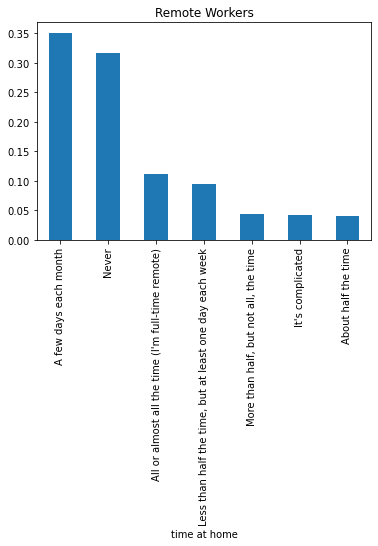

In [46]:
# Analyze and visualize the remote worker respondents

def clean_and_plot(df, title='Remote Workers', plot=True):
    '''
    INPUT 
        df - a dataframe holding the HomeRemote column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['HomeRemote'].value_counts().reset_index()
    study.rename(columns={'index': 'time at home', 'HomeRemote': 'count'}, inplace=True)

    study.set_index('time at home', inplace=True)
    if plot:
        (study/study.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study/study.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

Just from volume, we can see that working remotely is not that common. By far, most of the respondents said that they “never” work from home or only work from home “a few days each month.” However, the third highest number of respondents said that they work from home “all or almost all the time.”

In [36]:
# Analyze the data to get a base average for salary

df.mean()['Salary']

56298.48064062976

In [35]:
# Analyze the data to get a base average for job satisfaction rating

df.mean()['JobSatisfaction']

6.957078462452943

In [66]:
# Clean the data - remove NA values from df because they are not needed in analyzing the mean value
# Analyze the data to get average salary by remote working type

# Although dropping the NA values makes sense in this analysis, it is not technically needed because those values will not be included
#  in the mathematical calculations anyway
#  Removing the null values would be the correct decision because there is no way of inferring the remote work level from the null values

df.groupby(['HomeRemote']).mean()['Salary'].sort_values().dropna()

HomeRemote
Never                                                      46862.620192
More than half, but not all, the time                      53829.468074
It's complicated                                           55742.095768
About half the time                                        56568.194664
A few days each month                                      59226.876756
Less than half the time, but at least one day each week    64508.428807
All or almost all the time (I'm full-time remote)          74287.848573
Name: Salary, dtype: float64

In [16]:
# Clean the data - remove NA values from df because they are not needed in analyzing the mean value
# Analyze the data to get average salary by remote working type

# Although dropping the NA values makes sense in this analysis, it is not technically needed because those values will not be included
#  in the mathematical calculations anyway

df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

HomeRemote
Never                                                      6.632502
It's complicated                                           6.840830
More than half, but not all, the time                      6.953184
About half the time                                        6.973702
A few days each month                                      7.077509
Less than half the time, but at least one day each week    7.120125
All or almost all the time (I'm full-time remote)          7.388430
Name: JobSatisfaction, dtype: float64

In [65]:
# Analyze the data by looking at HomeRemote and YearsCodedJob

years_coded_job_options = df.groupby(['HomeRemote']).YearsCodedJob.value_counts();

years_coded_job_options

HomeRemote             YearsCodedJob 
A few days each month  1 to 2 years      1738
                       2 to 3 years      1706
                       3 to 4 years      1416
                       4 to 5 years      1247
                       5 to 6 years      1137
                                         ... 
Never                  16 to 17 years     169
                       13 to 14 years     132
                       17 to 18 years     123
                       19 to 20 years     101
                       18 to 19 years      87
Name: YearsCodedJob, Length: 147, dtype: int64

In [51]:
# Quantify the HomeRemote values into ratings from 0 being Never to 6 being Always
# Merge two dataframes to build the rating into the main dataframe

data = [['Never', 0], ['A few days each month', 1], ['Less than half the time, but at least one day each week', 2], ['About half the time', 3], ['It''s complcated', 4], ['More than half, but not all, the time', 5], ['All or almost all the time (I''m full-time remote)', 6]] 
  
remote_df = pd.DataFrame(data, columns = ['HomeRemote', 'RemoteValue']) 

remote_value_df = pd.merge(df, remote_df, on='HomeRemote')

remote_value_df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,HomeRemote_Cat,RemoteValue
0,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.000000,5,5
1,39,Professional developer,"Yes, both",Netherlands,No,"Independent contractor, freelancer, or self-em...",Bachelor's degree,"Information technology, networking, or system ...","More than half, but not all, the time",NaN,...,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,5,5
2,67,Professional developer,No,India,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"More than half, but not all, the time","5,000 to 9,999 employees",...,A bachelor's degree,South Asian,Strongly agree,Agree,Disagree,Agree,NaN,NaN,5,5
3,77,Professional developer,"Yes, both",United States,No,Employed full-time,Some college/university study without earning ...,Computer engineering or electrical/electronics...,"More than half, but not all, the time","1,000 to 4,999 employees",...,"Some college/university study, no bachelor's d...",White or of European descent,Disagree,Somewhat agree,Disagree,Somewhat agree,96283.0,NaN,5,5
4,106,Professional developer,"Yes, I contribute to open source projects",United Kingdom,No,Employed full-time,Doctoral degree,Fine arts or performing arts,"More than half, but not all, the time",Fewer than 10 employees,...,High school,White or of European descent,Somewhat agree,NaN,NaN,NaN,NaN,NaN,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37249,51293,Student,"Yes, both",Malaysia,"Yes, part-time",Employed part-time,Secondary school,NaN,About half the time,500 to 999 employees,...,"Some college/university study, no bachelor's d...",East Asian; South Asian,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,NaN,213.004484,1,3
37250,51343,Professional non-developer who sometimes write...,"Yes, both",Saudi Arabia,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",About half the time,10 to 19 employees,...,"Some college/university study, no bachelor's d...",Middle Eastern,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,1,3
37251,51366,Professional developer,"Yes, I program as a hobby",Czech Republic,No,Employed full-time,Some college/university study without earning ...,A natural science,About half the time,"10,000 or more employees",...,A master's degree,White or of European descent,Strongly agree,Somewhat agree,Disagree,Disagree,NaN,NaN,1,3
37252,51368,Student,"Yes, both",Spain,"Yes, full-time",Employed part-time,Bachelor's degree,Computer engineering or electrical/electronics...,About half the time,I don't know,...,A bachelor's degree,Hispanic or Latino/Latina; White or of Europea...,Somewhat agree,Somewhat agree,Strongly disagree,Agree,NaN,NaN,1,3


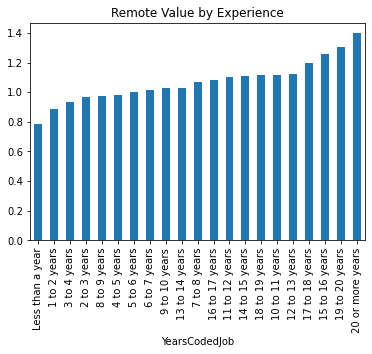

In [58]:
# Analyze Job Experience by Remote Work Rating

rv_df = remote_value_df.groupby(['YearsCodedJob']).mean()['RemoteValue'].sort_values().dropna()
rv_df.plot(kind='bar', legend=None);
plt.title('Remote Value by Experience');
plt.show()


The analysis here is to look at working remotely as a quantifiable value. Never working remotely has the value of 0 and always working remotely is a 6. 

This graph shows a definite trend to working remotely with more experience. 

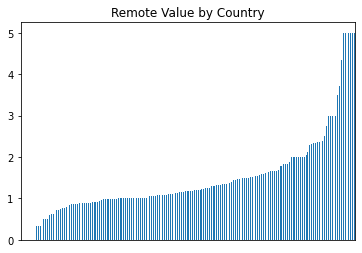

In [77]:
# Analyze Country by Remote Work Rating

rvcountry_df = remote_value_df.groupby(['Country']).mean()['RemoteValue'].sort_values().dropna()
rvcountry_df.plot(kind='bar', legend=None);
plt.title('Remote Value by Country');

# Remove X Axis because it is too cluttered
ax1 = plt.gca().xaxis.set_visible(False);

plt.show()


There is definitely a difference between countries and working remotely, but there are so many countries in the survey that we are going to lose significance of the data as we drill down and inspect the results from any one country.

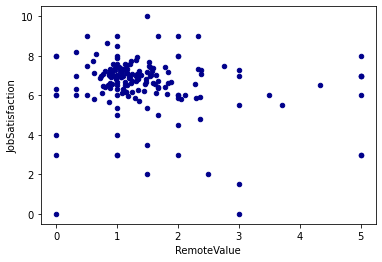

In [64]:
# Analyze Country by Job Satisfaction and Remote Work Rating

jscountry_df = df.groupby(['Country']).mean()['JobSatisfaction'].sort_values().dropna()
rv_js_country_df = pd.merge(rvcountry_df, jscountry_df, on='Country')
rv_js_country_df.head()
ax1 = rv_js_country_df.plot.scatter(x='RemoteValue',
                      y='JobSatisfaction',
                      c='DarkBlue')


There is no overwhelming trend between country, job satisfaction and working remotely. There are some outliers for countries that have extremely high “RemoteValues” and average job satisfaction, but on the whole, this looks like there is very little to be learned from this level of analysis.